In [45]:
# for the news entries, get source, and keywords in title, see how they distribute among real and fake

In [44]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [46]:
fakenews05=pd.read_csv("https://raw.githubusercontent.com/cuilimeng/CoAID/master/05-01-2020/NewsFakeCOVID-19.csv")
fakenews07=pd.read_csv("https://raw.githubusercontent.com/cuilimeng/CoAID/master/07-01-2020/NewsFakeCOVID-19.csv")
fakenews09=pd.read_csv("https://raw.githubusercontent.com/cuilimeng/CoAID/master/09-01-2020/NewsFakeCOVID-19.csv")
fakenews11=pd.read_csv("https://raw.githubusercontent.com/cuilimeng/CoAID/master/11-01-2020/NewsFakeCOVID-19.csv")
[fakenews05.columns,fakenews07.columns,fakenews09.columns,fakenews11.columns]

[Index(['Unnamed: 0', 'type', 'fact_check_url', 'archive', 'news_url',
        'news_url2', 'news_url3', 'news_url4', 'news_url5', 'title',
        'newstitle', 'content', 'abstract', 'publish_date', 'meta_keywords'],
       dtype='object'),
 Index(['Unnamed: 0', 'type', 'fact_check_url', 'archive', 'news_url',
        'news_url2', 'news_url3', 'news_url4', 'news_url5', 'title',
        'newstitle', 'content', 'abstract', 'publish_date', 'meta_keywords'],
       dtype='object'),
 Index(['Unnamed: 0', 'type', 'fact_check_url', 'archive', 'news_url',
        'news_url2', 'news_url3', 'news_url4', 'news_url5', 'title',
        'newstitle', 'content', 'abstract', 'publish_date', 'meta_keywords'],
       dtype='object'),
 Index(['Unnamed: 0', 'type', 'fact_check_url', 'archive', 'news_url',
        'news_url2', 'news_url3', 'news_url4', 'news_url5', 'title',
        'newstitle', 'content', 'abstract', 'publish_date', 'meta_keywords'],
       dtype='object')]

In [47]:
realnews05=pd.read_csv("https://raw.githubusercontent.com/cuilimeng/CoAID/master/05-01-2020/NewsRealCOVID-19.csv")
realnews07=pd.read_csv("https://raw.githubusercontent.com/cuilimeng/CoAID/master/07-01-2020/NewsRealCOVID-19.csv")
realnews09=pd.read_csv("https://raw.githubusercontent.com/cuilimeng/CoAID/master/09-01-2020/NewsRealCOVID-19.csv")
realnews11=pd.read_csv("https://raw.githubusercontent.com/cuilimeng/CoAID/master/11-01-2020/NewsRealCOVID-19.csv")
[realnews05.columns,realnews07.columns,realnews09.columns,realnews11.columns]

[Index(['Unnamed: 0', 'type', 'fact_check_url', 'news_url', 'title',
        'newstitle', 'content', 'abstract', 'publish_date', 'meta_keywords'],
       dtype='object'),
 Index(['Unnamed: 0', 'type', 'fact_check_url', 'news_url', 'title',
        'newstitle', 'content', 'abstract', 'publish_date', 'meta_keywords'],
       dtype='object'),
 Index(['Unnamed: 0', 'type', 'fact_check_url', 'news_url', 'title',
        'newstitle', 'content', 'abstract', 'publish_date', 'meta_keywords'],
       dtype='object'),
 Index(['Unnamed: 0', 'type', 'fact_check_url', 'news_url', 'title',
        'newstitle', 'content', 'abstract', 'publish_date', 'meta_keywords'],
       dtype='object')]

In [48]:
fakenews05['month']=5
fakenews07['month']=7
fakenews09['month']=9
fakenews11['month']=11

In [49]:
realnews05['month']=5
realnews07['month']=7
realnews09['month']=9
realnews11['month']=11

In [50]:
fakenewsall=pd.concat([fakenews05,fakenews07,fakenews09,fakenews11])
fakenewsall # 925 x 16

,Unnamed: 0,type,fact_check_url,archive,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords,month
0,0,post,https://factcheck.afp.com/false-advice-refusing-vaccines-circulates-during-covid-19-pandemic,https://perma.cc/J4N6-39D5,https://www.facebook.com/photo.php?fbid=551960552369167&set=a.112646526300574&type=3,NaN,NaN,NaN,NaN,Facebook posts shared in at least three countries as scientists work to develop a COVID-19 vaccine claim to offer a legal way to refuse vaccination.,NaN,NaN,NaN,NaN,NaN,5
1,1,article,https://www.politifact.com/factchecks/2020/apr/21/wisconsin-republican-legislative-leaders/no-wisconsin-not-clearly-seeing-decline-covid-case/,NaN,http://legis.wisconsin.gov/assembly/republicans/news/wisconsin-legislature-takes-gov-evers-to-court/,NaN,NaN,NaN,NaN,Wisconsin is Òclearly seeing a decline in COVID infectionsÓ.,"""Wisconsin Legislature Takes Gov. Evers to Court""",speaker robin vos r rochester and senate majority leader scott fitzgerald r juneau released the following statement after filing an original action in the wisconsin state supreme court challenging the governors extension of the safer at home order through may 26th. the public outcry over the safer at home order continues to increase as positive covid cases decrease or remain flat. there s immense frustration regarding the extension as it goes beyond the executive branchs statutory power.,NaN,NaN,"""""",5
2,2,post,https://factcheck.afp.com/posts-claim-children-covid-19-must-go-hospitals-alone,https://perma.cc/V4HX-M2XJ,https://www.facebook.com/iAmJessenia/photos/a.10151658017176441/10156793962781441/?type=3,NaN,NaN,NaN,NaN,Facebook posts claim a child who is infected with the novel coronavirus will be taken to a hospital unaccompanied.,NaN,NaN,NaN,NaN,NaN,5
3,3,post,https://checkyourfact.com/2020/04/20/fact-check-india-banned-people-posting-coronavirus-social-media/,NaN,https://www.facebook.com/kokernagnews/photos/a.1070663659747172/2181164582030402/?type=3&theater,NaN,NaN,NaN,NaN,IndiaÕs Ministry of Home Affairs banning citizens from posting about the new coronavirus on social media.,NaN,NaN,NaN,NaN,NaN,5
4,5,post,https://checkyourfact.com/2020/04/20/fact-check-44-senators-vote-against-sending-coronavirus-stimulus-payments/,NaN,https://www.facebook.com/photo.php?fbid=10219317734188369&set=gm.642428883004151&type=3&theater&ifg=1,NaN,NaN,NaN,NaN,"42 Democratic senators, plus two Independents, voted against sending direct payments to Americans as part of the coronavirus economic stimulus package.",NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,971,post,https://healthfeedback.org/claimreview/the-virus-causing-covid-19-most-likely-evolved-in-natural-wildlife-populations-before-spreading-to-humans/,https://archive.is/8cPJC,https://www.youtube.com/watch?v=qFlqXPl_hZQ&feature=youtu.be,NaN,NaN,NaN,NaN,Genetic evidence within the Spike gene of the SARS-CoV-2 genome suggest that the virus is a product of genetic manipulation,"""Coronavirus whistleblower speaks out about possible COVID origin on 'Tucker'""",NaN,dr. li meng yan joins tucker carlson with insight on tucker carlson tonight. foxnews tuckersubscribe to fox news. https://bit.ly/2vbuvaswatch more fox ne ....,9/15/20,"""coronavirus whistleblower, fox news whistleblower, chinese virologist, virologist, tucker coronavirus, tucker coronavirus whistleblower, Dr. Li-Meng Yan, tucker Dr. Li-Meng Yan, fox news Dr. Li-Meng Yan, fox news, fox news channel, fox news media, fox news network, tucker, tucker carlson, tucker carlson monologue, tucker carlson monologue tonight, tucker carlson tonight, tucker monologue, tucker monologue tonight, tucker tonight, coronavirus outbreak, Li-Meng Yan, virus""",11
27,972,post,https://healthfeedback.org/claimreview/cloth-masks-are-effective-at-reducing-virus-transmission-because-it-spreads-in-respiratory-droplets-which-are-larger-than-smoke-particles-and-the-pores-in-fabric/,https

In [51]:
realnewsall=pd.concat([realnews05,realnews07,realnews09,realnews11])
realnewsall # 4532 x 11

,Unnamed: 0,type,fact_check_url,news_url,title,newstitle,content,abstract,publish_date,meta_keywords,month
0,0,article,healthline.com,https://www.healthline.com/health-news/coronavirus-live-updates,Coronavirus Outbreak: Live Updates,"""Coronavirus Outbreak: Daily Updates""",experts warn most states that are reopening still are nt doing enough testing as more u.s. states start to loosen stay at home orders experts warn that covid-19 could come back if there s not enough testing. according to the associated press a significant number of states that are reopening are still not meeting key testing benchmarks suggested by harvards global health institute. according to the institute and the world health organization who there should be enough testing done that the.,the new coronavirus disease outbreak first identified in china has become a pandemic. stay up to date with the latest updates on covid-19.,NaN,"""coronavirus outbreak, viral outbreak, viral infection, virus, coronavirus""",5
1,1,article,healthline.com,https://www.healthline.com/health-news/screen-time-doesnt-hurt-kids-social-skills,"Screen Time Doesn’t Hurt Kids’ Social Skills, Study Finds","""Screen Time Doesn't Hurt Kids' Social Skills, Study Finds""",a new study finds an increase in screen time does nt hurt kids social skills. getty images a new study found that despite the time spent on smartphones todays young people are as socially skilled as those of the previous generation. researchers compared teacher and parent evaluations of kids who entered kindergarten in 1998 years before facebook with children who did so in 2010. even children within both groups who experienced the heaviest exposure to screens showed similar developme.,new research found that school age children in 2010 despite the time spent on smartphones and social media are as socially skilled as those at the same age in 1998 ..,NaN,"""screen time, child development, smartphones, brain development, ADHD""",5
2,2,article,healthline.com,https://www.healthline.com/health-news/heres-exactly-where-were-at-with-vaccines-and-treatments-for-covid-19,Here’s Exactly Where We Are with Vaccines and Treatments for COVID-19,"""Where We're at with Vaccines and Treatments for COVID-19""",scientists around the world are working on a number of vaccines and treatments for covid-19. xinhua zhang yuwei via getty images scientists around the world are working on potential treatments and vaccines for the new coronavirus disease known as covid-19. several companies are working on antiviral drugs some of which are already in use against other illnesses to treat people who already have covid-19. other companies are working on vaccines that could be used as a preventive measure aga.,scientists around the world are working on a number of vaccines and treatments for covid-19 ..,NaN,"""covid-19 coronavirus outbreak research progress vaccines antiviral drugs treatments""",5
3,3,article,healthline.com,https://www.healthline.com/health-news/heres-what-happens-to-the-body-after-contracting-the-coronavirus,Here’s What Happens to the Body After Contracting the New Coronavirus,"""Here's What Happens to the Body After Contracting the New Coronavirus""",coronaviruses cause respiratory illnesses so the lungs are usually affected first. early include fever cough and shortness of breath. these appear as soon as 2 days or as long as 14 days after exposure to the virus. but damage can also occur in other parts of the body especially during serious illness. all data and statistics are based on publicly available data at the time of publication. some information may be out of date. visit our coronavirus hub and follow our live updates pag.,heres what we know so far about how covid-19 affects the different systems in the body ..,NaN,"""coronavirus, viral infection, viral outbreak, covid-19, new coronavirus outbreak, outbreak, china, illness, anti-viral medication""",5
4,4,article,healthline.com,https://www.healthline.com/health-news/why-you-should-b

In [52]:
fakenewsall.count(),realnewsall.count()

(Unnamed: 0        925
 type              885
 fact_check_url    925
 archive           377
 news_url          885
 news_url2          93
 news_url3          60
 news_url4          34
 news_url5          15
 title             925
 newstitle         467
 content           416
 abstract          269
 publish_date      145
 meta_keywords     467
 month             925
 dtype: int64,
 Unnamed: 0        4532
 type              4529
 fact_check_url    4532
 news_url          4529
 title             4532
 newstitle         4508
 content           4024
 abstract          2847
 publish_date      1036
 meta_keywords     4508
 month             4532
 dtype: int64)

In [53]:
fakenewsall['source']=fakenewsall['news_url'].str.split('//').str[1].str.split('/').str[0]
realnewsall['source']=realnewsall['news_url'].str.split('//').str[1].str.split('/').str[0]
fakenewsall['source'],realnewsall['source']

(0        www.facebook.com
 1     legis.wisconsin.gov
 2        www.facebook.com
 3        www.facebook.com
 4        www.facebook.com
              ...         
 26        www.youtube.com
 27       www.facebook.com
 28       www.facebook.com
 29       www.facebook.com
 30           redstate.com
 Name: source, Length: 925, dtype: object,
 0      www.healthline.com
 1      www.healthline.com
 2      www.healthline.com
 3      www.healthline.com
 4      www.healthline.com
               ...        
 917    www.themonitor.com
 918          www.wral.com
 919      www.facebook.com
 920           twitter.com
 921            medium.com
 Name: source, Length: 4532, dtype: object)

In [54]:
fakenewsall['real/fake']='fake'
realnewsall['real/fake']='real'
fakenewsall.head(),realnewsall.head()

(   Unnamed: 0     type  \
 0           0     post   
 1           1  article   
 2           2     post   
 3           3     post   
 4           5     post   
 
                                                                                                                                    fact_check_url  \
 0                                                    https://factcheck.afp.com/false-advice-refusing-vaccines-circulates-during-covid-19-pandemic   
 1  https://www.politifact.com/factchecks/2020/apr/21/wisconsin-republican-legislative-leaders/no-wisconsin-not-clearly-seeing-decline-covid-case/   
 2                                                                 https://factcheck.afp.com/posts-claim-children-covid-19-must-go-hospitals-alone   
 3                                           https://checkyourfact.com/2020/04/20/fact-check-india-banned-people-posting-coronavirus-social-media/   
 4                                 https://checkyourfact.com/2020/04/20/fact-check-44-

In [311]:
newsall=pd.concat([fakenewsall,realnewsall])
newsall.head()

,Unnamed: 0,type,fact_check_url,archive,news_url,news_url2,news_url3,news_url4,news_url5,title,newstitle,content,abstract,publish_date,meta_keywords,month,source,real/fake
0,0,post,https://factcheck.afp.com/false-advice-refusing-vaccines-circulates-during-covid-19-pandemic,https://perma.cc/J4N6-39D5,https://www.facebook.com/photo.php?fbid=551960552369167&set=a.112646526300574&type=3,NaN,NaN,NaN,NaN,Facebook posts shared in at least three countries as scientists work to develop a COVID-19 vaccine claim to offer a legal way to refuse vaccination.,NaN,NaN,NaN,NaN,NaN,5,www.facebook.com,fake
1,1,article,https://www.politifact.com/factchecks/2020/apr/21/wisconsin-republican-legislative-leaders/no-wisconsin-not-clearly-seeing-decline-covid-case/,NaN,http://legis.wisconsin.gov/assembly/republicans/news/wisconsin-legislature-takes-gov-evers-to-court/,NaN,NaN,NaN,NaN,Wisconsin is Òclearly seeing a decline in COVID infectionsÓ.,"""Wisconsin Legislature Takes Gov. Evers to Court""",speaker robin vos r rochester and senate majority leader scott fitzgerald r juneau released the following statement after filing an original action in the wisconsin state supreme court challenging the governors extension of the safer at home order through may 26th. the public outcry over the safer at home order continues to increase as positive covid cases decrease or remain flat. there s immense frustration regarding the extension as it goes beyond the executive branchs statutory power.,NaN,NaN,"""""",5,legis.wisconsin.gov,fake
2,2,post,https://factcheck.afp.com/posts-claim-children-covid-19-must-go-hospitals-alone,https://perma.cc/V4HX-M2XJ,https://www.facebook.com/iAmJessenia/photos/a.10151658017176441/10156793962781441/?type=3,NaN,NaN,NaN,NaN,Facebook posts claim a child who is infected with the novel coronavirus will be taken to a hospital unaccompanied.,NaN,NaN,NaN,NaN,NaN,5,www.facebook.com,fake
3,3,post,https://checkyourfact.com/2020/04/20/fact-check-india-banned-people-posting-coronavirus-social-media/,NaN,https://www.facebook.com/kokernagnews/photos/a.1070663659747172/2181164582030402/?type=3&theater,NaN,NaN,NaN,NaN,IndiaÕs Ministry of Home Affairs banning citizens from posting about the new coronavirus on social media.,NaN,NaN,NaN,NaN,NaN,5,www.facebook.com,fake
4,5,post,https://checkyourfact.com/2020/04/20/fact-check-44-senators-vote-against-sending-coronavirus-stimulus-payments/,NaN,https://www.facebook.com/photo.php?fbid=10219317734188369&set=gm.642428883004151&type=3&theater&ifg=1,NaN,NaN,NaN,NaN,"42 Democratic senators, plus two Independents, voted against sending direct payments to Americans as part of the coronavirus economic stimulus package.",NaN,NaN,NaN,NaN,NaN,5,www.facebook.com,fake


In [312]:
# newsall.to_csv('allnewsdata.csv',index=False)

In [56]:
fakenewsall.source.unique(),realnewsall.source.unique()

(array(['www.facebook.com', 'legis.wisconsin.gov', nan, 'secondnexus.com',
        'www.gilmorehealth.com', 'twitter.com', 'www.tiktok.com',
        'youtu.be', 'www.theepochtimes.com', 'www.wivb.com',
        'www.teaparty.org', 'www.thedailybeast.com', 'www.rev.com',
        'video.foxnews.com', 'www.youtube.com',
        'therepublicpost.wordpress.com', 'gellerreport.com',
        'aviationdaily.news', 'pulpitandpen.org',
        'www.americanthinker.com', 'www.wearethemighty.com', 'medium.com',
        'www.weblyf.com', 'bustatroll.org', 'www.naturalnews.com',
        'www.newyorkonenews.com', 'n5ti.com', 'mavenroundtable.io',
        'drcarolehhaynes.com', 'wikitrusted.com',
        'www.studentproblems.com', 'www.foxnews.com',
        'mynacl.blogspot.com', 'www.whitehouse.gov', 'introtimes.com',
        'smartairfilters.com', 'gossipblend.com', 'channel45news.com',
        'www.nsemwoha.com', 'www.cbsnews.com', 'worldnewsdailyreport.com',
        'www.globalresearch.ca', 'buffal

In [57]:
set(fakenewsall.source)-set(realnewsall.source), set(realnewsall.source)-set(fakenewsall.source)

({'2020electioncenter.com',
  '21stcenturywire.com',
  'aviationdaily.news',
  'banned.video',
  'beforeitsnews.com',
  'beingtexan.com',
  'blackmentravels.com',
  'buffalochronicle.com',
  'bustatroll.org',
  'cbn2.com',
  'channel45news.com',
  'cloverchronicle.com',
  'conservativetears.com',
  'corsination.com',
  'crafty.diply.com',
  'dailyworldupdate.us',
  'dankingnews.com',
  'drcarolehhaynes.com',
  'edition.cnn.com',
  'envirowatchrangitikei.wordpress.com',
  'facebook.com',
  'factba.se',
  'fox40.com',
  'fromrome.info',
  'gellerreport.com',
  'gnews.org',
  'gossipblend.com',
  'governor.mo.gov',
  'grabien.com',
  'greatgameindia.com',
  'gumshoenews.com',
  'halturnerradioshow.com',
  'hannity.com',
  'hcqtrial.com',
  'healthchoice.org',
  'healthfeedback.org',
  'healthimpactnews.com',
  'introtimes.com',
  'ktrh.iheart.com',
  'lc.org',
  'legis.wisconsin.gov',
  'mavenroundtable.io',
  'mcmnt.com',
  'merryjane.com',
  'montanadailygazette.com',
  'mynacl.blogspot

In [58]:
set(fakenewsall.source).intersection(set(realnewsall.source))

{'abcnews.go.com',
 'm.facebook.com',
 'medium.com',
 nan,
 'transcripts.cnn.com',
 'twitter.com',
 'www.c-span.org',
 'www.facebook.com',
 'www.mediaite.com',
 'www.rev.com',
 'www.youtube.com'}

In [219]:
# set(fakenewsall.source).union(set(realnewsall.source))

In [68]:
# proportion of entries in fake and real that are from each source
fakenewssource=pd.DataFrame(fakenewsall.source.value_counts())
fakenewssource['percentage']=pd.DataFrame(fakenewsall.source.value_counts()/len(fakenewsall)*100)
fakenewssource.columns=['counts','percentage']
with pd.option_context("display.max_rows", None):
    display(fakenewssource)

,counts,percentage
www.facebook.com,516,55.783784
twitter.com,74,8.000000
www.youtube.com,37,4.000000
youtu.be,21,2.270270
www.instagram.com,21,2.270270
www.whitehouse.gov,7,0.756757
www.rev.com,6,0.648649
www.naturalnews.com,4,0.432432
www.toine360.com,4,0.432432
n5ti.com,4,0.432432


In [69]:
realnewssource=pd.DataFrame(realnewsall.source.value_counts())
realnewssource['percentage']=pd.DataFrame(realnewsall.source.value_counts()/len(realnewsall)*100)
realnewssource.columns=['counts','percentage']
with pd.option_context("display.max_rows", None):
    display(realnewssource)

,counts,percentage
www.webmd.com,1709,37.709620
www.cdc.gov,1031,22.749338
www.healthline.com,586,12.930274
www.medicalnewstoday.com,463,10.216240
www.sciencedaily.com,347,7.656664
www.who.int,158,3.486320
www.nih.gov,74,1.632833
newsroom.clevelandclinic.org,40,0.882613
newsnetwork.mayoclinic.org,35,0.772286
www.facebook.com,20,0.441306


In [275]:
# for each source, how many times does it appear in real and in fake?
allnewssource=list(set(fakenewsall.source).union(set(realnewsall.source)))
countsinfake=[]
countsinreal=[]
for i in allnewssource:
#     print(i)
#     print(len(fakenewssource[fakenewssource.index==i]))
    if (len(fakenewssource[fakenewssource.index==i])>0) and (len(realnewssource[realnewssource.index==i])==0): # if the source is only in fakenewssource
        countsinfake.append(fakenewssource[fakenewssource.index==i].counts.values)
        countsinreal.append(0)
    elif (len(fakenewssource[fakenewssource.index==i])>0) and (len(realnewssource[realnewssource.index==i])>0): # if the source is in both fake and real
        countsinfake.append(fakenewssource[fakenewssource.index==i].counts.values)
        countsinreal.append(realnewssource[realnewssource.index==i].counts.values)
    else: # if the source is only in real
        countsinreal.append(realnewssource[realnewssource.index==i].counts.values)
        countsinfake.append(0)
        
allnewssourcedf=pd.DataFrame()
allnewssourcedf['source']=allnewssource
allnewssourcedf['counts in fake']=countsinfake
allnewssourcedf['counts in real']=countsinreal
allnewssourcedf

,source,counts in fake,counts in real
0,NaN,0,[]
1,thenextweb.com,[1],0
2,2020electioncenter.com,[1],0
3,www.shtfplan.com,[1],0
4,halturnerradioshow.com,[2],0
...,...,...,...
195,sportinglife.ng,[1],0
196,www.eutimes.net,[1],0
197,www.thegatewaypundit.com,[4],0
198,www.newyorkonenews.com,[1],0


In [277]:
# add pct appearance in fake, in real
allnewssourcedf['pct in fake']=100*allnewssourcedf['counts in fake']/(allnewssourcedf['counts in fake']+allnewssourcedf['counts in real'])
allnewssourcedf['pct in real']=100*allnewssourcedf['counts in real']/(allnewssourcedf['counts in fake']+allnewssourcedf['counts in real'])
allnewssourcedf

,source,counts in fake,counts in real,pct in fake,pct in real
0,NaN,0,[],[],[]
1,thenextweb.com,[1],0,[100.0],[0.0]
2,2020electioncenter.com,[1],0,[100.0],[0.0]
3,www.shtfplan.com,[1],0,[100.0],[0.0]
4,halturnerradioshow.com,[2],0,[100.0],[0.0]
...,...,...,...,...,...
195,sportinglife.ng,[1],0,[100.0],[0.0]
196,www.eutimes.net,[1],0,[100.0],[0.0]
197,www.thegatewaypundit.com,[4],0,[100.0],[0.0]
198,www.newyorkonenews.com,[1],0,[100.0],[0.0]


In [291]:
# allnewssourcedf.to_csv('allnewssourcedistribution.csv',index=False)

In [151]:
# make word bag for real and fake, do word cloud
fakenewswordbag=' '.join(fakenewsall["title"]) # has repeats
encoded_string = fakenewswordbag.encode("ascii", "ignore")
decode_string = encoded_string.decode()
fakenewswordbag=decode_string
fakenewswordbag

'Facebook posts shared in at least three countries as scientists work to develop a COVID-19 vaccine claim to offer a legal way to refuse vaccination. Wisconsin is clearly seeing a decline in COVID infections. Facebook posts claim a child who is infected with the novel coronavirus will be taken to a hospital unaccompanied. Indias Ministry of Home Affairs banning citizens from posting about the new coronavirus on social media. 42 Democratic senators, plus two Independents, voted against sending direct payments to Americans as part of the coronavirus economic stimulus package. The photo of a vaccine for canine coronavirus proves that a vaccine exists for the novel coronavirus that causes COVID-19. A picture of a reporter in protective medical gear is an example of how the American media hypes the COVID-19 pandemic. A photo taken by a journalist showing a beach in Jacksonville, Florida, isnt from after the government reopened the beach as news reports have claimed. News photo from stay-at-

In [152]:
realnewswordbag=' '.join(realnewsall["title"])
encoded_string = realnewswordbag.encode("ascii", "ignore")
decode_string = encoded_string.decode()
realnewswordbag=decode_string
realnewswordbag

'Coronavirus Outbreak: Live Updates Screen Time Doesnt Hurt Kids Social Skills, Study Finds Heres Exactly Where We Are with Vaccines and Treatments for COVID-19 Heres What Happens to the Body After Contracting the New Coronavirus Why You Should Be Skeptical of Early Results of COVID-19 Drug What Your Social Media Posts Say About Your Stress Level Right Now Rural America Could Be the Region Hardest Hit by the COVID-19 Outbreak Experts Warning: Dont Use Off-Label Medications for COVID-19 Treatment Why Soaking Up the Sun to Treat COVID-19 Isnt a Bright Idea What to Know About a Long Recovery Period After Surviving COVID-19 Why Cooking Chicken to 165 Degrees Is Critical for Ensuring Safety, Preventing Illness Why COVID-19 is Hitting Men Harder Than Women What to Know About COVID-19 Testing Right Now Toddlers to Teens: How to Help Kids Cope with Stress from COVID-19 Losing Your Sense of Smell May Be an Early Symptom of COVID-19 1 in 5 Cancer Survivors Stays at Their Job Due to Fears of Losi

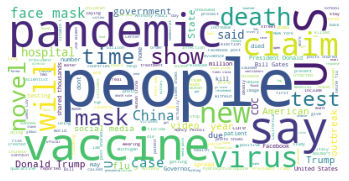

In [313]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

fakenewswordcloud=WordCloud(stopwords=STOPWORDS,background_color='white').generate(fakenewswordbag)
plt.imshow(fakenewswordcloud)
plt.axis('off')
plt.show()

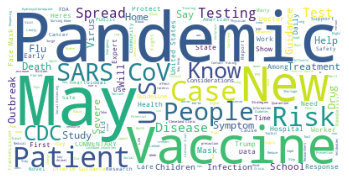

In [314]:
realnewswordcloud=WordCloud(stopwords=STOPWORDS,background_color='white').generate(realnewswordbag)
plt.imshow(realnewswordcloud)
plt.axis('off')
plt.show()

In [176]:
# fakenewswordcount=pd.DataFrame.from_dict(WordCloud().process_text(fakenewswordbag), orient='index')
# fakenewswordcount.columns=['count']
# fakenewswordcount.sort_values(by='count',ascending=False).head(20)

In [177]:
# realnewswordcount=pd.DataFrame.from_dict(WordCloud().process_text(realnewswordbag), orient='index')
# realnewswordcount.columns=['count']
# realnewswordcount.sort_values(by='count',ascending=False).head(20)

In [162]:
# set(realnewswordcount.index)-set(fakenewswordcount.index)
# do with nltk tokens?

In [163]:
# set(fakenewswordcount.index)-set(realnewswordcount.index)

In [187]:
# verify with nltk's tokenize?
from nltk import word_tokenize
import re
fakenewstokens=word_tokenize(re.sub(r'[^\w\s]', '', fakenewswordbag)) # remove punctuations
fakenewstokensdf=pd.DataFrame(fakenewstokens)
fakenewstokensdf.columns=['token']
fakenewstokenscounts=pd.DataFrame(fakenewstokensdf.token.value_counts())
fakenewstokenscounts.head(50)

,token
the,687
to,397
a,380
coronavirus,376
of,357
in,319
and,267
COVID19,249
that,204
is,193


In [209]:
realnewstokens=word_tokenize(re.sub(r'[^\w\s]', '', realnewswordbag))
realnewstokensdf=pd.DataFrame(realnewstokens)
realnewstokensdf.columns=['token']
realnewstokenscounts=pd.DataFrame(realnewstokensdf.token.value_counts())
realnewstokenscounts.head(50)

,token
COVID19,2191
to,1002
for,935
and,823
of,799
the,724
in,712
Coronavirus,359
a,312
COVID,311


In [166]:
set(fakenewstokens)-set(realnewstokens)

{'newspaper',
 'nearing',
 'cancelled',
 'resulted',
 'recreate',
 'ANTIFA',
 'labeled',
 'Vos',
 'visited',
 'colored',
 'freight',
 'Putin',
 'stage',
 'depicts',
 'foreigners',
 'criticizing',
 'army',
 'strewn',
 'failing',
 'broadcaster',
 'Theyre',
 'Telecommunications',
 'murdered',
 'toxicity',
 'socalled',
 'disposable',
 'Photos',
 'anticoagulants',
 'inflated',
 'sensors',
 'mistaken',
 'felt',
 'ongoing',
 'chemicals',
 'vapor',
 'poll',
 'coronavirusinfected',
 'move',
 'Originated',
 'charged',
 'detrimental',
 'left',
 'Luc',
 'manufacturing',
 'Speaker',
 'dIvoire',
 'jail',
 'ashore',
 'hypoxic',
 'combination',
 'diet',
 'tabletop',
 '227',
 'supposed',
 'pension',
 'prepare',
 'cigarette',
 'Daniel',
 'buildings',
 'prohibited',
 'conveniently',
 'Rome',
 'HORSES',
 'ancient',
 'NV',
 'Sanders',
 'excuse',
 'threat',
 'former',
 'concealed',
 'Charles',
 'Resignations',
 'issued',
 'daughter',
 'losses',
 'knew',
 'pretended',
 'Brian',
 'Tanks',
 'painting',
 'heme'

In [167]:
set(realnewstokens)-set(fakenewstokens)

{'Layers',
 'Interim',
 'Shipments',
 'Willing',
 'Deliveries',
 'Companion',
 'Falsenegative',
 'targets',
 'Quilting',
 'Institutions',
 'Colds',
 'Lancet',
 'Block',
 'CROI',
 'Harvest',
 '1918',
 'Toolkit',
 'Where',
 'Tough',
 'Worlds',
 'Tears',
 'Disease2019',
 'BrainEating',
 'Mitigating',
 'BARDA',
 'NEWS',
 'Dust',
 'Generic',
 'Tougher',
 'Brings',
 'Cut',
 'Counter',
 'workplace',
 'NJ',
 'Arrival',
 'Neanderthal',
 'Window',
 'Chicken',
 'Readies',
 'questions',
 'Stopping',
 'Stretching',
 'Think',
 'Attitudes',
 'Discovery',
 'Sept',
 'Confident',
 'Deployment',
 'Large',
 'Strikes',
 'Ones',
 'Injury',
 'Heroes',
 'turn',
 'Investigations',
 'calculate',
 'Deadliest',
 'Fallout',
 'Updates',
 'Hyperglycemia',
 'Shock',
 'fall',
 'Stolen',
 'Breakthrough',
 'Behavior',
 'Commissioner',
 'Choices',
 'CVD',
 'Selling',
 'Growing',
 'Suspended',
 'Admitted',
 'Materials',
 'Rash',
 'Cancels',
 'Billing',
 'Expert',
 'CV',
 'Analyze',
 'Tuberville',
 'MI',
 'Shifting',
 'exp

In [215]:
# set(realnewstokens).intersection(set(fakenewstokens))

In [205]:
# for the set differences, show the number of times each word appears in real/fake
fakenewsonlytokens=pd.DataFrame(set(fakenewstokens)-set(realnewstokens))
fakenewsonlytokens.columns=['token']
fakenewsonlytokens

,token
0,newspaper
1,nearing
2,cancelled
3,resulted
4,recreate
...,...
2201,connection
2202,part
2203,exact
2204,conspiracy


In [212]:
fakenewsonlytokenscounts=[]
for i in fakenewsonlytokens.index:
    token=fakenewsonlytokens.loc[i,'token']
    fakenewsonlytokenscounts.append(int(fakenewstokenscounts[fakenewstokenscounts.index==token].token))

fakenewsonlytokens['count']=fakenewsonlytokenscounts
fakenewsonlytokens=fakenewsonlytokens.sort_values('count',ascending=False)
fakenewsonlytokens

,token,count
1520,shared,39
312,claims,35
1427,media,35
1612,video,35
695,government,30
...,...,...
862,captions,1
861,red,1
859,nationals,1
858,none,1


In [216]:
# fakenewsonlytokens.to_csv('fakenewsonlytokens.csv',index=False)

In [211]:
realnewsonlytokens=pd.DataFrame(set(realnewstokens)-set(fakenewstokens))
realnewsonlytokens.columns=['token']
realnewsonlytokenscounts=[]
for i in realnewsonlytokens.index:
    token=realnewsonlytokens.loc[i,'token']
    realnewsonlytokenscounts.append(int(realnewstokenscounts[realnewstokenscounts.index==token].token))

realnewsonlytokens['count']=realnewsonlytokenscounts
realnewsonlytokens=realnewsonlytokens.sort_values('count',ascending=False)
realnewsonlytokens

,token,count
4603,What,244
4222,Can,168
2065,Guidance,124
3654,Be,106
2776,Risk,106
...,...,...
2373,Editorial,1
2374,religious,1
2375,contribution,1
2377,Bradycardia,1


In [217]:
# realnewsonlytokens.to_csv('realnewsonlytokens.csv',index=False)

In [283]:
# realnewsonlytokens.head(50)
fakenewstokenscounts

,token
the,687
to,397
a,380
coronavirus,376
of,357
...,...
proteins,1
theory,1
live,1
Brian,1


In [299]:
# for each word, how many times does it appear in fake, and how many times in real?
allnewstokens=list(set(fakenewstokens).union(set(realnewstokens)))
tokencountsinfake=[]
tokencountsinreal=[]
for i in allnewstokens:
#     print(i)
    if (len(fakenewstokenscounts[fakenewstokenscounts.index==i])>0) and (len(realnewstokenscounts[realnewstokenscounts.index==i])==0): # if the token is only in fakenewstokens not in realnewstokens
#         print('fake only')
        tokencountsinfake.append(fakenewstokenscounts[fakenewstokenscounts.index==i].token.values)
        tokencountsinreal.append(0)
    elif (len(fakenewstokenscounts[fakenewstokenscounts.index==i])>0) and (len(realnewstokenscounts[realnewstokenscounts.index==i])>0): # if the token is in both fake and real
#         print('both')
        tokencountsinfake.append(fakenewstokenscounts[fakenewstokenscounts.index==i].token.values)
        tokencountsinreal.append(realnewstokenscounts[realnewstokenscounts.index==i].token.values)
    else: # if the token is only in real
#         print('real only')
        tokencountsinreal.append(realnewstokenscounts[realnewstokenscounts.index==i].token.values)
        tokencountsinfake.append(0)
        
alltokensdf=pd.DataFrame()
alltokensdf['token']=allnewstokens
alltokensdf['counts in fake']=tokencountsinfake
alltokensdf['counts in real']=tokencountsinreal
alltokensdf

,token,counts in fake,counts in real
0,Layers,0,[2]
1,death,[22],[6]
2,resulted,[1],0
3,Interim,0,[61]
4,labeled,[2],0
...,...,...,...
9161,Iran,[1],[1]
9162,therefore,[8],0
9163,y,0,[1]
9164,Mardi,0,[1]


In [300]:
# add pct appearance in fake, in real
alltokensdf['pct in fake']=100*alltokensdf['counts in fake']/(alltokensdf['counts in fake']+alltokensdf['counts in real'])
alltokensdf['pct in real']=100*alltokensdf['counts in real']/(alltokensdf['counts in fake']+alltokensdf['counts in real'])
alltokensdf

,token,counts in fake,counts in real,pct in fake,pct in real
0,Layers,0,[2],[0.0],[100.0]
1,death,[22],[6],[78.57142857142857],[21.428571428571427]
2,resulted,[1],0,[100.0],[0.0]
3,Interim,0,[61],[0.0],[100.0]
4,labeled,[2],0,[100.0],[0.0]
...,...,...,...,...,...
9161,Iran,[1],[1],[50.0],[50.0]
9162,therefore,[8],0,[100.0],[0.0]
9163,y,0,[1],[0.0],[100.0]
9164,Mardi,0,[1],[0.0],[100.0]


In [304]:
alltokensdf=alltokensdf.sort_values('pct in fake',ascending=False)
alltokensdf

,token,counts in fake,counts in real,pct in fake,pct in real
2858,form,[3],0,[100.0],[0.0]
7332,22nd,[1],0,[100.0],[0.0]
3016,separated,[1],0,[100.0],[0.0]
7327,moved,[1],0,[100.0],[0.0]
3018,fakenews,[1],0,[100.0],[0.0]
...,...,...,...,...,...
3800,Ahead,0,[1],[0.0],[100.0]
3799,strongest,0,[1],[0.0],[100.0]
3798,Martin,0,[2],[0.0],[100.0]
3796,noncommunicable,0,[1],[0.0],[100.0]


In [305]:
# alltokensdf.to_csv('alltokensdistribution.csv',index=False)

In [308]:
alltokensdf.sort_values('counts in fake',ascending=False).head(50)

,token,counts in fake,counts in real,pct in fake,pct in real
9039,the,[687],[724],[48.68887313961729],[51.31112686038271]
3653,to,[397],[1002],[28.377412437455327],[71.62258756254468]
8506,a,[380],[312],[54.91329479768786],[45.08670520231214]
2523,coronavirus,[376],[96],[79.66101694915254],[20.338983050847457]
8830,of,[357],[799],[30.88235294117647],[69.11764705882354]
363,in,[319],[712],[30.940834141610086],[69.05916585838992]
2328,and,[267],[823],[24.495412844036696],[75.5045871559633]
7649,COVID19,[249],[2191],[10.204918032786885],[89.79508196721312]
8028,that,[204],[40],[83.60655737704919],[16.39344262295082]
8468,is,[193],[61],[75.98425196850394],[24.015748031496063]


In [171]:
# stopwords2=STOPWORDS.update(['COVID','Coronavirus','coronavirus'])
# fakenewswordcloud2=WordCloud(stopwords=stopwords2,background_color='white').generate(fakenewswordbag)
# plt.imshow(fakenewswordcloud2)
# plt.axis('off')
# plt.show()

In [172]:
# realnewswordcloud2=WordCloud(stopwords=stopwords2,background_color='white').generate(realnewswordbag)
# plt.imshow(realnewswordcloud2)
# plt.axis('off')
# plt.show()

In [173]:
# # for each row, add source, title, newstitle
# # other entries not as helpful
# from nltk import word_tokenize
# word_tokenize("Why is the Covid-19 Death Rate So Low?")

In [117]:
# pip install snscrape

In [118]:
# snscrape --jsonl twitter-search 'since_id:1320246372008853503 max_id:1320246372008853504 filter:safe'

In [214]:
# import requests
# from bs4 import BeautifulSoup
# url = "https://twitter.com/RampCapitalLLC/status/1312737912543481856"
# response = requests.get(url)
# print(response.status_code)
# results_page=BeautifulSoup(response.content)
# results_page.find_all('div')

In [ ]:
# https://medium.com/@wyfok/web-scrape-twitter-by-python-selenium-part-1-b3e2db29051d
# https://towardsdatascience.com/how-to-scrape-tweets-from-twitter-59287e20f0f1
# -> https://betterprogramming.pub/how-to-scrape-tweets-with-snscrape-90124ed006af (doesn't work bc only have access to tweet id)